In [1]:
getwd()

[1] "C:/Users/julia"

In [6]:
library(odin.dust)

In [7]:
gen_sir <- odin.dust::odin_dust("sir.R")

Loading required namespace: pkgbuild

i 18 functions decorated with [[cpp11::register]]

v generated file cpp11.R

v generated file cpp11.cpp

Re-compiling sir77a075f7



-  installing *source* package 'sir77a075f7' ...
   ** using staged installation
   ** libs
   g++  -std=gnu++11 -I"C:/Users/julia/anaconda3/lib/R/include" -DNDEBUG  -I'C:/Users/julia/anaconda3/Lib/R/library/cpp11/include'     -IC:/Users/julia/anaconda3/Lib/R/library/dust/include -DHAVE_INLINE -fopenmp   -O2 -Wall  -march=x86-64 -mtune=generic  -Wall -pedantic -c cpp11.cpp -o cpp11.o
   g++  -std=gnu++11 -I"C:/Users/julia/anaconda3/lib/R/include" -DNDEBUG  -I'C:/Users/julia/anaconda3/Lib/R/library/cpp11/include'     -IC:/Users/julia/anaconda3/Lib/R/library/dust/include -DHAVE_INLINE -fopenmp   -O2 -Wall  -march=x86-64 -mtune=generic  -Wall -pedantic -c dust.cpp -o dust.o
   dust.cpp: In function 'cpp11::sexp dust::dust_info(const dust::pars_type<T>&) [with T = sir]':
   dust.cpp:298:28: warning: variable 'internal' set but not used [-Wunused-but-set-variable]
     298 |   const sir::internal_type internal = pars.internal;
         |                            ^~~~~~~~
   g++ -shared -s

i Loading sir77a075f7



In [8]:
sir_model <- gen_sir$new(pars = list(dt = 1,
                                     S_ini = 1000,
                                     I_ini = 10,
                                     beta = 0.2,
                                     gamma = 0.1),
                         step = 1,
                         n_particles = 10L,
                         n_threads = 4L,
                         seed = 1L)

The initial state is ten particles wide, four states deep (t, S, I, R):

In [9]:
sir_model$state()

0,0,0,0,0,0,0,0,0,0
1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
10,10,10,10,10,10,10,10,10,10
0,0,0,0,0,0,0,0,0,0


Run the particles (repeats) forward 10 steps of length dt, followed by another 10 steps:

In [10]:
sir_model$run(10)

10,10,10,10,10,10,10,10,10,10
988,974,979,967,972,966,956,975,987,955
15,27,24,28,29,29,36,19,13,42
7,9,7,15,9,15,18,16,10,13


In [11]:
sir_model$run(20)

20,20,20,20,20,20,20,20,20,20
937,907,898,870,897,881,870,917,933,867
36,54,69,79,66,74,71,38,41,71
37,49,43,61,47,55,69,55,36,72


We can change the parameters, say by increasing the infection rate and the population size, by reinitalising the model with reset(). We will also use a smaller time step to calculate multiple transitions per unit time:

In [12]:
dt <- 0.25
n_particles <- 10L
p_new <- list(dt = dt, S_ini = 2000, I_ini = 10, beta = 0.4, gamma = 0.1)
sir_model$update_state(pars = p_new, step = 0)
sir_model$state()

0,0,0,0,0,0,0,0,0,0
2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
10,10,10,10,10,10,10,10,10,10
0,0,0,0,0,0,0,0,0,0


Let’s run this epidemic forward, and plot the trajectories:

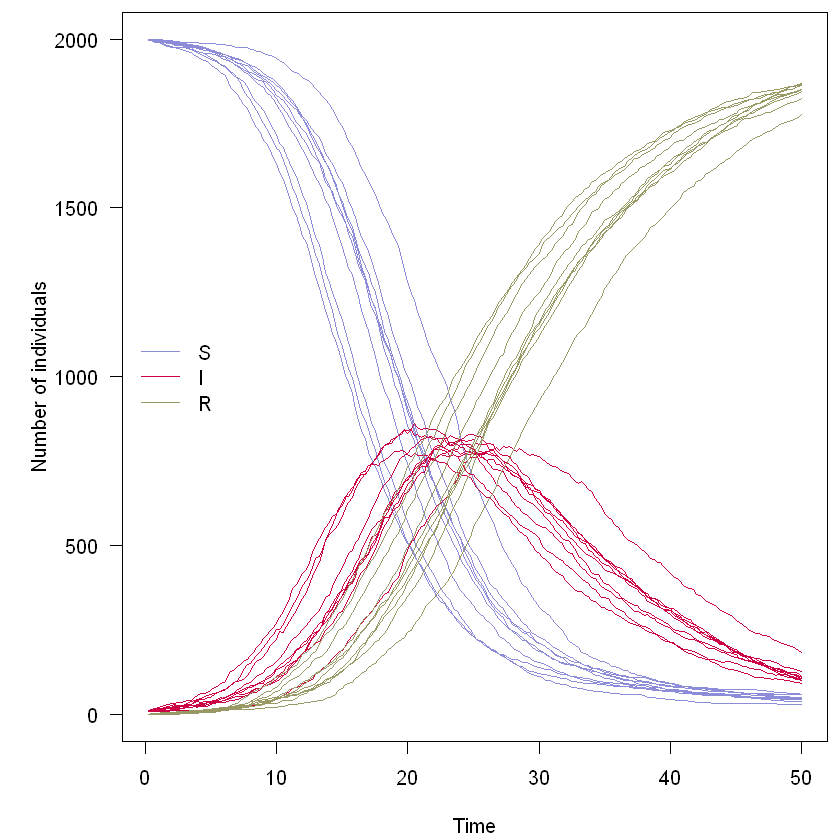

In [13]:
n_steps <- 200
x <- array(NA, dim = c(sir_model$info()$len, n_particles, n_steps))

for (t in seq_len(n_steps)) {
  x[ , , t] <- sir_model$run(t)
}
time <- x[1, 1, ]
x <- x[-1, , ]

par(mar = c(4.1, 5.1, 0.5, 0.5), las = 1)
cols <- c(S = "#8c8cd9", I = "#cc0044", R = "#999966")
matplot(time, t(x[1, , ]), type = "l",
         xlab = "Time", ylab = "Number of individuals",
         col = cols[["S"]], lty = 1, ylim = range(x))
matlines(time, t(x[2, , ]), col = cols[["I"]], lty = 1)
matlines(time, t(x[3, , ]), col = cols[["R"]], lty = 1)
legend("left", lwd = 1, col = cols, legend = names(cols), bty = "n")